In [1]:
import random
import math
import numpy as np

import copy


import sys, os, time

from qinfer import LiuWestResampler
from qinfer import utils

from qiskit import IBMQ
from qiskit import QuantumCircuit, execute, Aer
import qiskit.ignis.verification.randomized_benchmarking as rb
import matplotlib.lines as mlines

IBMQ.load_account()


Failed to import duecredit due to No module named 'duecredit'
/home/alan/aur/miniconda3/lib/python3.8/site-packages/IPython/parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "
/home/alan/aur/miniconda3/lib/python3.8/site-packages/qinfer/parallel.py:61: UserWarning: Could not import IPython parallel. Parallelization support will be disabled.
  warnings.warn(


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sbs

import smc_linear as smc
Distribution = smc.Distribution

sbs.set(style="darkgrid")

%matplotlib inline

In [3]:
def design_circuit(n_qubits, inv_arr, circuit=None):
    
    if circuit is None:
        circuit = QuantumCircuit(n_qubits, n_qubits)
    
    for i, element in enumerate(inv_arr):
        if element == 1:
            circuit.x(i)
    
    circuit.measure(list(range(n_qubits)), list(range(n_qubits)))
    return circuit

In [4]:
def random_circuit(n_qubits):
    length_vector = [1]
    n_seeds = 1
    
    initial_list = list(range(0, n_qubits))    
    rb_pattern = []
    
    while len(initial_list) > 1:
        sample = random.sample(initial_list, 2)
        [initial_list.remove(i) for i in sample]
        rb_pattern.append(sample)
    
    if len(initial_list) == 1:
        rb_pattern.append([initial_list[0]])
    
    
    circuit, xdata = rb.randomized_benchmarking_seq(
        length_vector = [1],
        nseeds = 1,
        rb_pattern = rb_pattern
        )
    circuit = circuit[0][0]
    cregs = circuit.cregs
    
    circuit.remove_final_measurements(inplace=True)
    circuit.cregs = cregs
    
    for i in range(n_qubits):
        circuit.barrier(i)
        if (round(random.random())):
            circuit.x(i)
            circuit.barrier(i)
    
    return circuit

In [27]:
n_qubits = 5
circuit = random_circuit(n_qubits)

In [28]:
len(circuit)

48

In [29]:
provider = IBMQ.get_provider(group='open', project='main')
backend = provider.get_backend('ibmq_16_melbourne')

n_measurements = 200
n_experiments = 10
n_points = 4000

results = []

for i in range(n_experiments):    

    result_data = {}
    
    

    result_data['circuit'] = circuit
    result_data['risk'] = []
    result_data['mean'] = []
    result_data['len'] = len(circuit)
    
    dist = Distribution(n_points=n_points, n_qubits=n_qubits)


    for _ in range(n_measurements):
        
        inversion_arr = dist.next_experiment()       
        
        tmp_circuit = copy.deepcopy(circuit)
        tmp_circuit = design_circuit(n_qubits, inversion_arr, circuit=tmp_circuit)

        
        job = execute(tmp_circuit, backend, shots=1)
        
        result = job.result()
        outcome = list(map(int, list(list(result.get_counts(circuit).keys())[0])))     
        
        print("Measurements: {} Outcome: {}".format(inversion_arr, outcome))
        dist.measure(outcome, inversion_arr)
        
        result_data['risk'].append(dist.calc_bayes_risk())
        result_data['mean'].append(dist.calc_bayes_mean())

    
    result_data['distrubtion'] = dist
    results.append(result_data)


Measurements: [1, 0, 0, 0, 0] Outcome: [0, 0, 0, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 0, 1, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 1, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 1, 1, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 1, 0, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 1, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 0, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measuremen

Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 1, 0, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 1, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 1, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 0, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 0, 1]
Measuremen

Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 1, 0, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 1, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 0, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 0, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 0, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 1, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 0, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 1, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measuremen

Future exception was never retrieved
future: <Future finished exception=ConnectionClosed('WebSocket connection is closed: code = 4002 (private use), no reason')>
websockets.exceptions.ConnectionClosed: WebSocket connection is closed: code = 4002 (private use), no reason


Measurements: [0, 0, 0, 0, 1] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 1, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 1, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 0, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 0, 0, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 1, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 1, 1, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 1, 0, 1]
Measuremen

Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 1, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 1, 1, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 1, 1, 0, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 1, 0, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 1, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 0, 0, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 1, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 0, 1, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 0, 1, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 1, 1]
Measuremen

Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 1, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 0, 1, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 1, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 1, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 0, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 0, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 0, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 1, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 0]
Measuremen

Future exception was never retrieved
future: <Future finished exception=ConnectionClosed('WebSocket connection is closed: code = 4002 (private use), no reason')>
websockets.exceptions.ConnectionClosed: WebSocket connection is closed: code = 4002 (private use), no reason


Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 1, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 0, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 0, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 1, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 0, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 1, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 0, 1, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 0]
Measuremen

Measurements: [0, 0, 1, 0, 0] Outcome: [1, 1, 1, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 1, 1, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 1, 1, 1, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 0, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [0, 0, 0, 0, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 0, 1, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 1, 1, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 1, 0, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 0, 0, 1]
Measuremen

Future exception was never retrieved
future: <Future finished exception=ConnectionClosed('WebSocket connection is closed: code = 4002 (private use), no reason')>
websockets.exceptions.ConnectionClosed: WebSocket connection is closed: code = 4002 (private use), no reason


Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 0, 0, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]


Future exception was never retrieved
future: <Future finished exception=ConnectionClosed('WebSocket connection is closed: code = 4002 (private use), no reason')>
websockets.exceptions.ConnectionClosed: WebSocket connection is closed: code = 4002 (private use), no reason


Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 0]


Future exception was never retrieved
future: <Future finished exception=ConnectionClosed('WebSocket connection is closed: code = 4002 (private use), no reason')>
websockets.exceptions.ConnectionClosed: WebSocket connection is closed: code = 4002 (private use), no reason


Measurements: [1, 0, 0, 0, 0] Outcome: [0, 0, 0, 0, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 1, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 0, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 1, 0, 1, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [0, 0, 0, 1, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 1, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 0, 1, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 1, 1, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 1, 1, 0, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 1, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 1, 0]
Measuremen

Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 0, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 0, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 1, 0, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 1, 0, 1, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 1, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 0, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 0, 0, 1, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 0, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 1, 1]
Measuremen

Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 0, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 0, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 0, 0, 1, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 1, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 0, 1, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 0, 1, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 1, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measuremen

Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 1, 1, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 0, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 1, 0, 1, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [0, 0, 0, 0, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [0, 0, 0, 1, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [0, 1, 0, 0, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measuremen

Future exception was never retrieved
future: <Future finished exception=ConnectionClosed('WebSocket connection is closed: code = 4002 (private use), no reason')>
websockets.exceptions.ConnectionClosed: WebSocket connection is closed: code = 4002 (private use), no reason


Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 0, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 1, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 1, 0, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 1, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 1, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 1, 1, 0]
Measuremen

Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 1, 0, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 1, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 0, 0, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 1, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 1, 0, 0, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 0, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 0, 1, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 0, 1, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 1, 0, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 0, 1]
Measuremen

Future exception was never retrieved
future: <Future finished exception=ConnectionClosed('WebSocket connection is closed: code = 4002 (private use), no reason')>
websockets.exceptions.ConnectionClosed: WebSocket connection is closed: code = 4002 (private use), no reason


Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 0, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 1, 0, 1, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 1, 0, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 0, 0, 1, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 1, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 0, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 1, 0, 0, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 0, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 1, 1, 0, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 1, 0, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 0, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 1, 0, 1, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 0, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 0, 1]
Measuremen

Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 1, 0, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [0, 0, 1, 0, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 1, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [0, 1, 0, 1, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [0, 0, 0, 0, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 1, 1, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 1, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 1, 0, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 1, 0, 1, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [0, 0, 0, 0, 0]
Measuremen

Future exception was never retrieved
future: <Future finished exception=ConnectionClosed('WebSocket connection is closed: code = 4002 (private use), no reason')>
websockets.exceptions.ConnectionClosed: WebSocket connection is closed: code = 4002 (private use), no reason


Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 1, 1, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 1, 1, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 0, 1, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 1, 1, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 1, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 1, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 1, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 0, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 1, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 1, 0, 0, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 1, 0, 0, 0]
Measuremen

In [74]:
measurements = '''Measurements: [1, 0, 0, 0, 0] Outcome: [0, 1, 1, 1, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [0, 1, 1, 0, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 0, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 0, 1, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [1, 0, 1, 0, 0]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 1, 1, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 0, 1, 1, 1]
Measurements: [0, 1, 0, 0, 0] Outcome: [0, 1, 1, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 0, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 1, 1, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 1, 0, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [0, 0, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 0, 1, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 0, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 0, 1, 1, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 1, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 1, 1, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [0, 1, 1, 1, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [0, 1, 1, 0, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 1, 1, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 1, 1, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 1, 1, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [1, 1, 1, 1, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 1, 1, 0, 0]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 1, 1, 1, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 1, 1, 1, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [0, 1, 0, 1, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 1, 1, 0, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 1, 1, 0, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 1, 0, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 1, 1, 1, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 1, 1, 0, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 1, 0, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 0, 1, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 0, 1, 0, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 0, 1, 1, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 0, 1, 1, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 1, 1, 1, 1]
Measurements: [0, 0, 0, 1, 0] Outcome: [0, 0, 0, 0, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 1, 1, 1, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 0, 1, 0, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 1, 1, 1, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 1, 1, 1, 1]
Measurements: [0, 0, 0, 0, 1] Outcome: [0, 1, 1, 1, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 1, 1, 1, 0]
Measurements: [0, 0, 0, 0, 1] Outcome: [1, 1, 1, 0, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [0, 1, 1, 1, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 1, 0, 1]
Measurements: [1, 0, 0, 0, 0] Outcome: [0, 1, 1, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 1, 0, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 1, 0, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 0, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 0, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 1, 0, 1, 0]
Measurements: [1, 0, 0, 0, 0] Outcome: [1, 0, 1, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 1, 0, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 0, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 1, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 0, 0, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 1, 1, 0]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 0, 0, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 1, 0, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [0, 1, 0, 0, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 1, 0, 1, 1]
Measurements: [0, 0, 1, 0, 0] Outcome: [1, 0, 0, 1, 0]'''

measurements_arr = [list(map(int, list(''.join(m.split(' ')[1:6]).replace('[', '').replace(']', '').replace(',', '')))) 
for m in measurements.split('\n')]
outcomes_arr = [list(map(int, list(''.join(m.split(' ')[7:]).replace('[', '').replace(']', '').replace(',', '')))) 
for m in measurements.split('\n')]

In [88]:
len(measurements_arr)

68

In [91]:
n_points = 4000
n_qubits = 5

vals = []
m_outcomes = {}
m_outcomes_order = []

dist = Distribution(n_points=n_points, n_qubits=n_qubits)

for m_number, (measurement, outcome) in enumerate(zip(measurements_arr, outcomes_arr)):    

    dist.measure(outcome, measurement)

    vals.append([dist.calc_bayes_mean(), dist.calc_bayes_risk()])
    
    bayes_mean = dist.calc_bayes_mean()
    m_arr = [1 if bayes_mean[2 * i + 1] < bayes_mean[2 * i] else 0 for i in range(len(bayes_mean) // 2)]
           
    m_arr_str = ''.join(list(map(str, m_arr)))
        
    print(m_arr_str)
    
    if m_number % 10 == 0:
        print("Calculating outcome: ", m_number)
        m_outcomes_order.append(m_arr_str)
        
        if m_arr_str not in m_outcomes:
        
            job = execute(tmp_circuit, backend, shots=4000)

            result = job.result()

            m_outcomes[m_arr_str] = result.get_counts(circuit)    


10000
Calculating outcome:  0
10011
11111
11111
11111
11111
11111
11111
11111
11111
11111
Calculating outcome:  10
11111
11111
11111
11111
11111
11011
11011
11011
11011
11011
Calculating outcome:  20
01111
01111
01111
01111
01011
01011
00111
00011
00111
00111
Calculating outcome:  30
00111
00111
00111
00111
00111
01111
01111
01111
01111
01111
Calculating outcome:  40
01111
01111
01111
01111
01111
01111
01111
01111
01111
01111
Calculating outcome:  50
01111
01111
01111
01111
01111
01111
01111
01111
01111
01111
Calculating outcome:  60
01111
01111
01111
01111
01111
01111
01111


In [99]:
m_outcomes_order = ['10000', '11111', '11011', '00111', '01111', '01111', '01111', '01111']

In [109]:
import operator
stats = {'a':1000, 'b':3000, 'c': 100}
max(stats, key=lambda key: stats[key])

'b'

In [100]:

for i in m_outcomes_order:
    print(max(m_outcomes[i].values()))

1297
1306
1336
1326
1333
1333
1333
1333


In [223]:
n_repeats = 1000
x_coords = np.array([[i * 10] * n_repeats for i in range(len(m_outcomes_order))]).flatten()
y_coords = 1 - np.array(
    [bootstrap(
        m_outcomes[m_outcomes_order[i]], 
        target = max(m_outcomes[m_outcomes_order[i]], key=lambda key: m_outcomes[m_outcomes_order[i]][key]), 
        samples=900, repeats=n_repeats) 
     for i in range(len(m_outcomes_order))
    ]).flatten()

In [129]:
def bootstrap(result, target=0, samples=900, repeats=1000):
    sampler = []
    for i in result:
        for _ in range(result[i]):
            sampler.append(int(i))
            
    probs = []
    
    for _ in range(repeats):
        tally = 0
        for i in range(samples):
            sample = sampler[random.randint(0, len(sampler) - 1)]
            
            if int(target) == sample:
                tally += 1
        
        probs.append(tally / samples)
    return probs

In [143]:
circuit.depth()

14

In [159]:
circuit.draw()

┌───┐                ┌───┐┌─────┐┌───┐┌───┐      ░ ┌───┐┌───┐ ┌───┐ »
qr_0: ─┤ H ├────────────────┤ X ├┤ SDG ├┤ H ├┤ X ├──────░─┤ X ├┤ H ├─┤ S ├─»
      ┌┴───┴┐┌───┐┌───┐  ░  └─┬─┘└┬───┬┘├───┤├───┤  ░   ░ └───┘└───┘ └───┘ »
qr_1: ┤ SDG ├┤ H ├┤ Y ├──░────┼───┤ Y ├─┤ H ├┤ S ├──░──────────────────────»
      └┬───┬┘├───┤├───┤  ░    │   ├───┤ ├───┤└─░─┘┌───┐   ┌───┐     ┌─────┐»
qr_2: ─┤ H ├─┤ H ├┤ S ├──■────┼───┤ X ├─┤ Z ├──░──┤ Z ├───┤ X ├──■──┤ SDG ├»
      ┌┴───┴┐├───┤└───┘┌─┴─┐  │   └─┬─┘ ├───┤  ░  ├───┤   └─┬─┘┌─┴─┐└┬───┬┘»
qr_3: ┤ SDG ├┤ H ├─────┤ X ├──┼─────■───┤ Y ├──░──┤ Y ├─────■──┤ X ├─┤ H ├─»
      └┬───┬┘├───┤┌───┐└───┘  │         └───┘  ░  └───┘ ░      └───┘ └───┘ »
qr_4: ─┤ H ├─┤ H ├┤ S ├───────■─────────────────────────░──────────────────»
       └───┘ └───┘└───┘                                 ░                  »
cr_0: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_1: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_2: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_3: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_4: ═════════════════════════════════════════════════════════════════════»
                                                                           »
«           ┌───┐ ┌───┐   ░  ┌───┐ ░ 
«qr_0: ─────┤ X ├─┤ H ├───░──┤ X ├─░─
«           └─┬─┘ └───┘   ░  └───┘ ░ 
«qr_1: ───────┼──────────────────────
«      ┌───┐  │   ┌───┐   ░  ┌───┐ ░ 
«qr_2: ┤ H ├──┼───┤ H ├───░──┤ X ├─░─
«      ├───┤  │   └─░─┘   ░  └───┘ ░ 
«qr_3: ┤ S ├──┼─────░────────────────
«      └───┘  │  ┌─────┐┌───┐┌───┐ ░ 
«qr_4: ───────■──┤ SDG ├┤ H ├┤ H ├─░─
«                └─────┘└───┘└───┘ ░ 
«cr_0: ══════════════════════════════
«                                    
«cr_1: ══════════════════════════════
«                                    
«cr_2: ══════════════════════════════
«                                    
«cr_3: ══════════════════════════════
«                                    
«cr_4: ══════════════════════════════
«

In [161]:
sig = m_outcomes['01111']

In [218]:
n_repeats = 100
x_coords = np.array([[i] * n_repeats for i in range(len(sig))]).flatten()
y_coords = np.array([bootstrap(sig, target=sig[i], repeats=n_repeats, samples=3600) for i in sig]).flatten()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

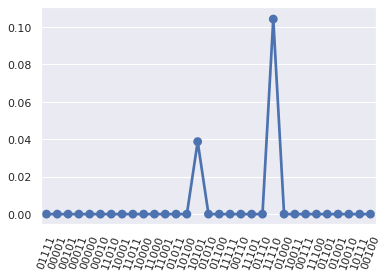

In [219]:
ax = sbs.pointplot(x_coords, y_coords, ci=100)
plt.xticks(range(len(sig)), [i for i in sig])
plt.xticks(rotation=70)

In [229]:
n_repeats = 1000
x_coords = np.array([[i * 10] * n_repeats for i in range(len(m_outcomes_order))]).flatten()
y_coords = 1 - np.array(
    [bootstrap(
        m_outcomes[m_outcomes_order[i]], 
        target = max(m_outcomes[m_outcomes_order[i]], key=lambda key: m_outcomes[m_outcomes_order[i]][key]), 
        samples=3600, repeats=n_repeats) 
     for i in range(len(m_outcomes_order))
    ]).flatten()

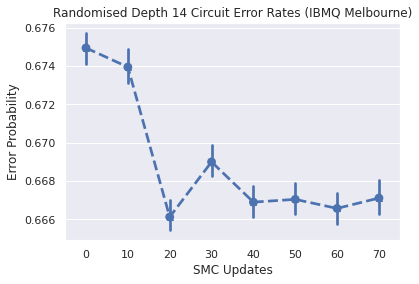

In [231]:
ax = sbs.pointplot(x_coords, y_coords, ci=100)

ax.lines[0].set_marker('^')
ax.lines[0].set_linestyle('--')

london = mlines.Line2D([], [], color='blue', marker='.',
                          markersize=10, label='IBMQ Virgo')

plt.xlabel("SMC Updates")
plt.ylabel("Error Probability")
plt.title("Randomised Depth 14 Circuit Error Rates (IBMQ Melbourne)")
plt.savefig('figs/error_rates_rb_melbourne.pdf')

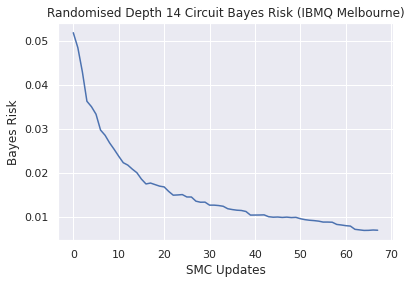

In [233]:
plt.plot(result_data['risk'])
plt.xlabel("SMC Updates")
plt.ylabel("Bayes Risk")
plt.title("Randomised Depth 14 Circuit Bayes Risk (IBMQ Melbourne)")
plt.savefig('figs/bayes_risk_rb_melbourne.pdf')

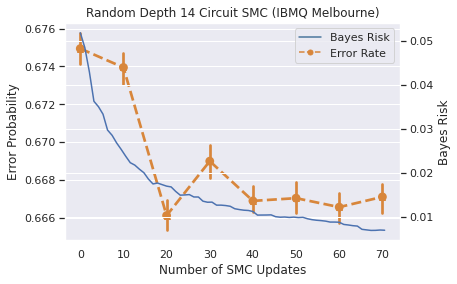

In [282]:
ax = sbs.pointplot(x_coords, y_coords, ci=100, color=sbs.xkcd_rgb["dull orange"])


ax.lines[0].set_marker('^')
ax.lines[0].set_linestyle('--')

ax2 = ax.twinx()
ax2.plot(np.array(list(range(len(result_data['risk'])))) / 9.5, result_data['risk'])

risk_line = mlines.Line2D([], [], color=sbs.xkcd_rgb["dull orange"], marker='.', linestyle='--',
                          markersize=10, label='Error Rate')

error_line = mlines.Line2D([], [], color=sbs.xkcd_rgb["dull blue"], marker='',
                          markersize=10, label='Bayes Risk')


ax.set_xlabel("Number of SMC Updates")
ax2.set_ylabel("Bayes Risk")
ax.set_ylabel("Error Probability")


virgo = mlines.Line2D([], [], color=sbs.xkcd_rgb["pale orange"], marker='.', linestyle='--',
                          markersize=10, label='IBMQ London')

# virgo = mlines.Line2D([], [], color=sbs.xkcd_rgb["pale red"], marker='.', linestyle='--',
#                           markersize=10, label='IBMQ London')
# london = mlines.Line2D([], [], color='blue', marker='.',
#                           markersize=10, label='IBMQ Virgo')

plt.legend(handles=[error_line, risk_line ])

plt.title("Random Depth 14 Circuit SMC (IBMQ Melbourne)")
plt.savefig('figs/error_rates_rb_melbourne.pdf')

In [82]:
dist.calc_bayes_mean()

array([0.13980472, 0.16229988, 0.19568418, 0.10152287, 0.10913229,
       0.09918431, 0.20688252, 0.12822603, 0.15834115, 0.07890442])

In [77]:
vals

[[array([0.12365901, 0.12015607, 0.11873158, 0.12537282, 0.11991129,
         0.12397685, 0.11887833, 0.12424383, 0.11993012, 0.12339368]),
  0.052173470113106704],
 [array([0.12278849, 0.11511191, 0.1123531 , 0.12639014, 0.1121034 ,
         0.12466892, 0.16177729, 0.12503201, 0.16289882, 0.12329074]),
  0.0493019962589168],
 [array([0.16310184, 0.11751111, 0.15648734, 0.12576104, 0.15965223,
         0.12435068, 0.18348717, 0.12517363, 0.16133187, 0.11592164]),
  0.04371803049637872],
 [array([0.17746309, 0.11947061, 0.17221391, 0.12586105, 0.17742961,
         0.12295194, 0.16933588, 0.12099941, 0.15210143, 0.10537972]),
  0.03679598517005232],
 [array([0.1718965 , 0.12150059, 0.17280789, 0.12051053, 0.17379981,
         0.12256885, 0.18659529, 0.12531556, 0.17716251, 0.10642112]),
  0.035435900675133115],
 [array([0.18530288, 0.12062637, 0.1690026 , 0.16045225, 0.1710004 ,
         0.12551102, 0.18189974, 0.12929106, 0.17256602, 0.10769285]),
  0.03362792471342392],
 [array([0.1847

In [55]:
ex_res = []
for i in range(0, len(measurements_arr), 10):
    
    inversion_arr = measurements_arr[i]       
        
    tmp_circuit = copy.deepcopy(circuit)
    tmp_circuit = design_circuit(n_qubits, inversion_arr, circuit=tmp_circuit)
    
    job = execute(tmp_circuit, backend, shots=1000)
        
    result = job.result()
    outcome = result.get_counts(circuit)
    
    ex_res.append(outcome)
    print(inversion_arr)
    

[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 0, 1, 0]
[1, 0, 0, 0, 0]
[0, 0, 0, 0, 1]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]


In [69]:
i_state = [1, 0, 1, 0, 0]
for r_i, i in enumerate(range(0, len(measurements_arr), 10)):
    inversion_arr = measurements_arr[i]
    c_state = np.array(i_state) ^ np.array(inversion_arr)
    print(c_state)
    print(ex_res[r_i][''.join(list(reversed(''.join(list(map(str, c_state))))))])

[0 0 1 0 0]
322
[0 0 1 0 0]
322
[1 0 1 1 0]
67
[0 0 1 0 0]
347
[1 0 1 0 1]
84
[1 0 0 0 0]
101
[1 0 0 0 0]
96


In [15]:
result_data['mean']

[array([0.1259141 , 0.12193364, 0.12019969, 0.12376671, 0.11909311,
        0.12622314, 0.11890342, 0.12435747, 0.11640816, 0.12364888]),
 array([0.12535949, 0.11509708, 0.11480152, 0.12430637, 0.11364926,
        0.12635727, 0.16295312, 0.12444519, 0.16005555, 0.1238496 ]),
 array([0.16619406, 0.11901289, 0.16021493, 0.12530022, 0.15853591,
        0.12611345, 0.18423105, 0.12254581, 0.1586316 , 0.11920085]),
 array([0.18128723, 0.11841711, 0.17632748, 0.12682811, 0.1747591 ,
        0.11948982, 0.1721101 , 0.1219551 , 0.15089083, 0.11486349]),
 array([0.17716834, 0.12014138, 0.17530998, 0.12278844, 0.17263279,
        0.1181856 , 0.18535614, 0.12307128, 0.17361681, 0.11803762]),
 array([0.19292551, 0.12217543, 0.17830934, 0.16121401, 0.16892617,
        0.12002751, 0.18333025, 0.12306336, 0.17086794, 0.11586485]),
 array([0.1936687 , 0.11928782, 0.18446873, 0.15693175, 0.15615696,
        0.11701425, 0.17389902, 0.157077  , 0.15942094, 0.10714981]),
 array([0.20239695, 0.12048321, 0.

In [16]:
result_data['circuit'].draw()

┌───┐                ┌───┐┌─────┐┌───┐┌───┐      ░ ┌───┐┌───┐ ┌───┐ »
qr_0: ─┤ H ├────────────────┤ X ├┤ SDG ├┤ H ├┤ X ├──────░─┤ X ├┤ H ├─┤ S ├─»
      ┌┴───┴┐┌───┐┌───┐  ░  └─┬─┘└┬───┬┘├───┤├───┤  ░   ░ └───┘└───┘ └───┘ »
qr_1: ┤ SDG ├┤ H ├┤ Y ├──░────┼───┤ Y ├─┤ H ├┤ S ├──░──────────────────────»
      └┬───┬┘├───┤├───┤  ░    │   ├───┤ ├───┤└─░─┘┌───┐   ┌───┐     ┌─────┐»
qr_2: ─┤ H ├─┤ H ├┤ S ├──■────┼───┤ X ├─┤ Z ├──░──┤ Z ├───┤ X ├──■──┤ SDG ├»
      ┌┴───┴┐├───┤└───┘┌─┴─┐  │   └─┬─┘ ├───┤  ░  ├───┤   └─┬─┘┌─┴─┐└┬───┬┘»
qr_3: ┤ SDG ├┤ H ├─────┤ X ├──┼─────■───┤ Y ├──░──┤ Y ├─────■──┤ X ├─┤ H ├─»
      └┬───┬┘├───┤┌───┐└───┘  │         └───┘  ░  └───┘ ░      └───┘ └───┘ »
qr_4: ─┤ H ├─┤ H ├┤ S ├───────■─────────────────────────░──────────────────»
       └───┘ └───┘└───┘                                 ░                  »
cr_0: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_1: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_2: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_3: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_4: ═════════════════════════════════════════════════════════════════════»
                                                                           »
«           ┌───┐ ┌───┐   ░  ┌───┐ ░ 
«qr_0: ─────┤ X ├─┤ H ├───░──┤ X ├─░─
«           └─┬─┘ └───┘   ░  └───┘ ░ 
«qr_1: ───────┼──────────────────────
«      ┌───┐  │   ┌───┐   ░  ┌───┐ ░ 
«qr_2: ┤ H ├──┼───┤ H ├───░──┤ X ├─░─
«      ├───┤  │   └─░─┘   ░  └───┘ ░ 
«qr_3: ┤ S ├──┼─────░────────────────
«      └───┘  │  ┌─────┐┌───┐┌───┐ ░ 
«qr_4: ───────■──┤ SDG ├┤ H ├┤ H ├─░─
«                └─────┘└───┘└───┘ ░ 
«cr_0: ══════════════════════════════
«                                    
«cr_1: ══════════════════════════════
«                                    
«cr_2: ══════════════════════════════
«                                    
«cr_3: ══════════════════════════════
«                                    
«cr_4: ══════════════════════════════
«

In [18]:
result_data['circuit']

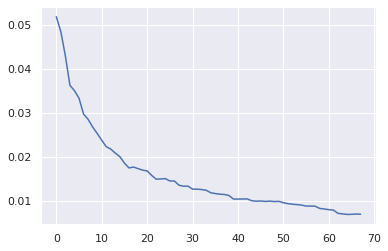

In [49]:
for i in range(0, len(result_data)):
    print(i)

0
1
2
3
